

# Project: The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the TMDB movie dataset which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Each row contains information about the movies in the following variables. The dataset contains the following variables.
* genres
* popularity
* cast
* director
* budget_adj
* revenue_adj
* release_date

In this dataset i would like to explore the following questions:
* Which genres are most popular from year to year?
* What kind of properties are associated with movies of high revenues?
* Who is the highest grossing director based on revenue?
* Who is the highest grossing actor based on revenue?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Read the data
df = pd.read_csv('tmdb_movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# return the last few rows, we can specify any number of rows
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# return the dimesnsions of dataframe i.e the number of samples, number of columns
df.shape

(10866, 21)

In [6]:
# return the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# # this displays a summary of dataframe including non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# The datatype for imdb_id shows as object, further investigation shows that it is a string.String will always appear as objects in pandas
type(df["imdb_id"][0])

str

In [8]:
# return the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# return useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning 

In [3]:
# drop the duplicates for each column of data
df.drop_duplicates(inplace=True)

In [4]:
# drop all the null values present in the rows 
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year)

In [6]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [16]:
# Write a function to use groupby and add the values of particular row
def groupby(column_name,column):
    return df.groupby([column_name])[column].sum().nlargest(10)

In [15]:
groupby('genres','popularity')

genres
Drama                                        107.406988
Comedy                                       100.448838
Action|Adventure|Science Fiction|Thriller     65.384732
Adventure|Fantasy|Action                      52.432370
Drama|Romance                                 48.952658
Adventure|Action|Thriller                     44.114381
Action|Adventure|Science Fiction              40.311399
Adventure|Action|Science Fiction              39.440355
Comedy|Drama|Romance                          38.236105
Comedy|Romance                                36.541258
Name: popularity, dtype: float64

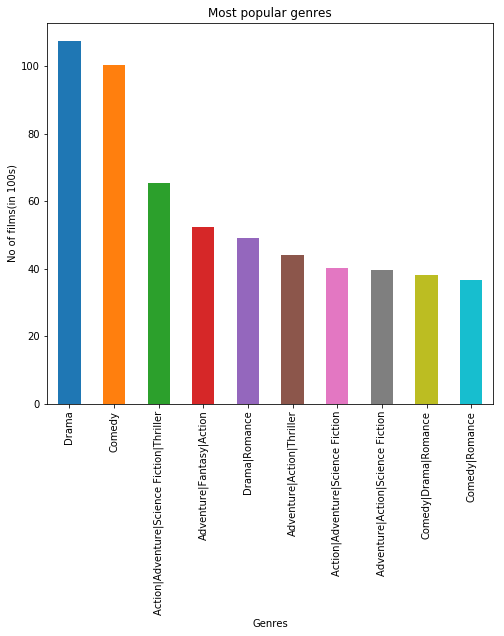

In [14]:
# plot a barchart to display the popularity of genres througout the years
plt.figure(figsize=(8,7))
groupby('genres','popularity').plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('No of films(in 100s)')
plt.title('Most popular genres');

#### Drama is the most popular genre with more than 1000 films followed by Comedey(more than 800) and Action|Adventure|Science Fiction|Thriller(more than 600).

In [22]:
df.genres.value_counts()[:10]

Drama                   127
Comedy                  105
Drama|Romance            52
Documentary              51
Horror|Thriller          50
Comedy|Drama             46
Comedy|Romance           45
Comedy|Drama|Romance     42
Horror                   30
Drama|Thriller           28
Name: genres, dtype: int64

### Research Question 2  (What kinds of properties are associated with movies that have high revenues)

In [106]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


C:\Users\Nik\Downloads\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


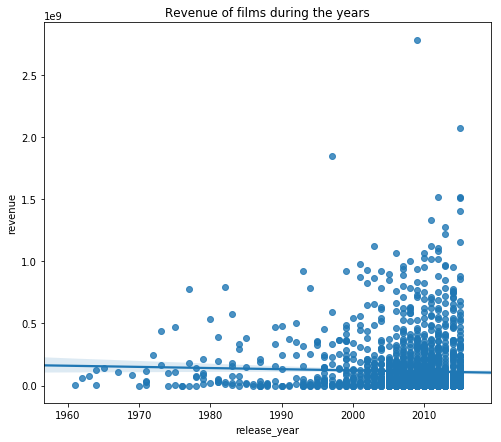

In [18]:
# plot a scatterplot to show the relationship between the variables
plt.figure(figsize=(8,7))
sns.regplot(x='release_year',y='revenue',data=df)
plt.title('Revenue of films during the years');

#### This shows a negative trend in the correlation which means the release year has no impact in the revenue of the film

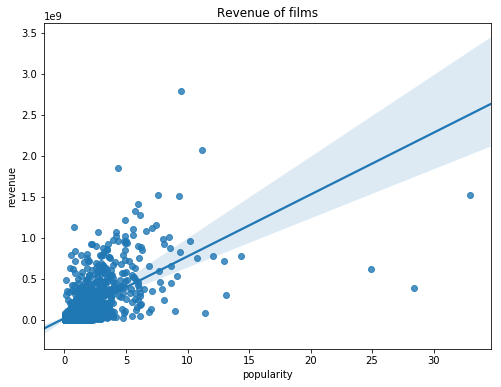

In [19]:
# plot a scatterplot to show the relationship between the variables
plt.figure(figsize=(8,6))
sns.regplot(x='popularity',y='revenue',data=df)
plt.title('Revenue of films');

#### The above regplot shows that popularity has a huge impact on the revenue

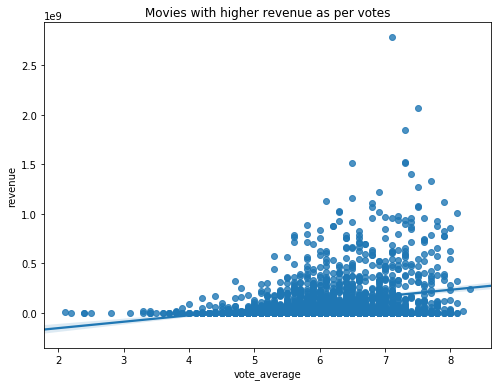

In [20]:
# show the relationship between revenues and vote average
plt.figure(figsize=(8,6))
sns.regplot(x='vote_average',y='revenue',data=df)
plt.title('Movies with higher revenue as per votes');

#### Many movies that have higher votes have earnt more revenue.

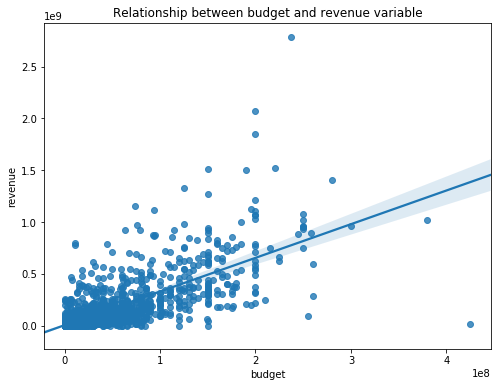

In [21]:
# plot a scatterplot to see the relationship betweeen budget and revenue
plt.figure(figsize=(8,6))
sns.regplot(x='budget',y='revenue',data=df)
plt.title('Relationship between budget and revenue variable');

#### Budget has a good imapact on the revenue. Many films with higher budget made good revenue which makes the line go upwards

### Research question 3:
Who is the highest grossing director?

In [10]:
# Write a function to use groupby
def groupby(column_name,column):
    return df.groupby([column_name])[column].sum().nlargest(10)

In [11]:
# use groupby to return highest grossing directors
groupby('director','revenue')

director
Peter Jackson        5943642820
Steven Spielberg     5257606337
James Cameron        4721952106
David Yates          4154295625
Christopher Nolan    4053833672
George Lucas         3201550893
Francis Lawrence     3179979588
Michael Bay          3164378459
Sam Raimi            3079057712
Gore Verbinski       3016685549
Name: revenue, dtype: int64

#### Peter Jackson appeared to be the highest grossing director followed by Steven Spielberg,James Cameron,David Yates

### Research question 4:
Who is the highest grossing actor?

In [87]:
# apply split function to clear the filters
split= lambda df: df['cast'].split('|')
df['cast'] = df.apply(split,axis=1)

In [88]:
# show the names of leading starcast
leading_starcast=df.cast.str[0]

In [89]:
# create a new column
df['leading_starcast'] = leading_starcast

In [28]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_starcast
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy


In [90]:
# use the function to return top grossing actors
groupby('leading_starcast')

leading_starcast
Robert Downey Jr.    6323224449
Daniel Radcliffe     6154469421
Johnny Depp          4861855508
Tom Hanks            4466357249
Tom Cruise           4380708848
Harrison Ford        4084680705
Christian Bale       3701156585
Daniel Craig         3620314404
Sam Worthington      3361440175
Mike Myers           3294259979
Name: revenue, dtype: int64

#### Robert Downey Jr. is the highest grossing actor till date. The later positions were taken by  Daniel Radcliffe,Johnny Depp,Tom Hanks,Tom Cruise.The positions may vary due to release in recent movies. 

## Conclusions:
* Drama is the most popular genre which is gaining popularity since many years.Majority of the films are based on drama.
* Release year has no impact in the revenue which seems surprising because many films are being released in the recent years also many films fail to collect more revenue.
* Popularity is the only factor having the highest impact on the revenue. More people are aware of a film based on the popularity.
* Movies have also collected revenues basd on the vote count making it an important factor. People also look at the counts recieved before watching a film.
* Budget is another important factor. Due to the changes in technology like VFX, 3D and increase in budget the films began collecting more revenue.

### Limitations:
* Dropping the values can show bias towards the relationship or association.
* The critic reviews are not mentioned in the dataset which plays a huge role in the revenue of the film. 

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0